## Contexto de la base de datos

Esta base de datos busca estudiar las relaciones entre las variables que afectan el salario.
El conjunto de datos se obtuvo de múltiples fuentes, incluidas encuestas, sitios de publicación de trabajos y otras fuentes disponibles públicamente. Se recopiló un total de 6704 puntos de datos. El conjunto de datos incluía cinco variables: edad, experiencia, función laboral y nivel de educación y salario.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Descripción de Aproximación
Aproximación por Curiosidad

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salary_data = pd.read_csv('/content/drive/MyDrive/EstadisticaProyecto/Salary_Data/Salary_Data.csv')
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Valores nulos

Hay 6704 entradas en el data set. Muy pocos de estos datos de entradas contienen campos nulos. Los valores nulos serán eliminados.

In [3]:
salary_data.info()
salary_data[salary_data.isnull().any(axis=1)]
salary_data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


### Valores inconsistentes

Hay valores diferentes econtrados que son usados para referirse a los mismos valores, por lo que convertiremos estos valores en consistentes. Estos valores pueden ser PhD y phD por ejemplo.

In [4]:
salary_data['Education Level'].value_counts()

Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [7]:
def unificarValoresPHD(s):
    for e in ['Bachelor', 'Master', 'PhD']:
        if e.lower() in s.lower(): return e
    return s

salary_data['Education Level'] = salary_data['Education Level'].apply(unificarValoresPHD)
salary_data['Education Level'].value_counts()

Bachelor       3021
Master         1860
PhD            1369
High School     448
Name: Education Level, dtype: int64

### Entradas duplicadas

Usando ```duplicated().sum()```, se ha encontrado 4912 valores de entrada duplicados. Entonces, se utiliza ```pivot_table()``` para revisar el número de valores duplicados.

In [8]:
salary_data.duplicated().sum()
salary_data.pivot_table(index = ['Age', 'Gender', 'Education Level',  'Job Title', 'Years of Experience', 'Salary'], aggfunc ='size').sort_values().tail(10)
#salary_data.drop_duplicates()  # choose to keep them since it is possible to have duplicate data

Age   Gender  Education Level  Job Title          Years of Experience  Salary  
29.0  Male    Bachelor         Marketing Analyst  4.0                  70000.0     33
26.0  Male    Bachelor         Data Analyst       3.0                  130000.0    35
25.0  Male    Bachelor         Product Manager    1.0                  60000.0     36
27.0  Male    Bachelor         Software Engineer  4.0                  140000.0    37
29.0  Female  Master           Data Scientist     6.0                  180000.0    37
33.0  Female  Master           Product Manager    11.0                 198000.0    38
32.0  Male    Bachelor         Software Engineer  8.0                  190000.0    39
27.0  Male    Bachelor         Software Engineer  3.0                  80000.0     45
24.0  Female  High School      Receptionist       0.0                  25000.0     45
32.0  Male    Bachelor         Product Manager    7.0                  120000.0    45
dtype: int64

## Objetivo del análisis estadístico

Se busca estudiar las relaciones entre las variables que influyen en el salario de las personas.

In [9]:
salary_data.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


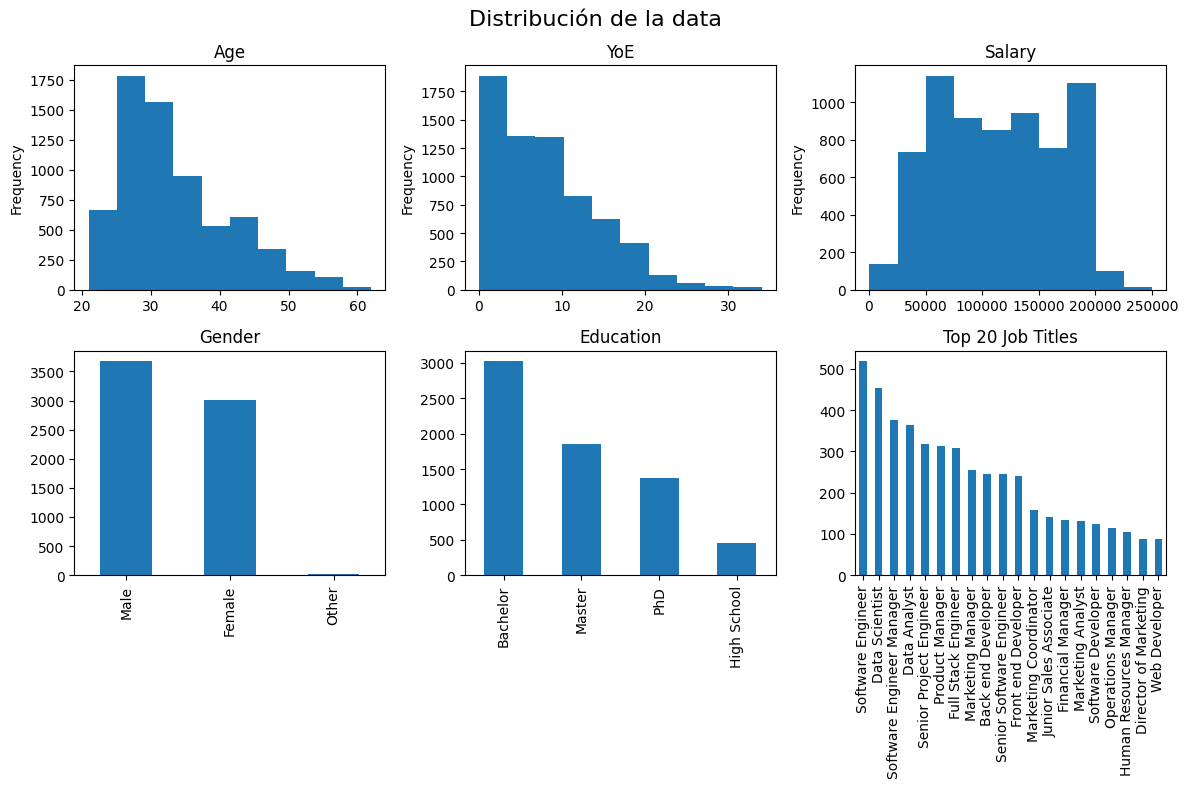

In [10]:
salary_data['Age'] = salary_data['Age'].astype('int')
salary_data['Years of Experience'] = salary_data['Years of Experience'].astype('int')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

salary_data['Age'].plot(kind='hist', ax=axes[0, 0], title='Age')
salary_data['Years of Experience'].plot(kind='hist', ax=axes[0, 1], title='YoE')
salary_data['Salary'].plot(kind='hist', ax=axes[0, 2], title='Salary')
salary_data['Gender'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Gender')
salary_data['Education Level'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Education')
salary_data['Job Title'].value_counts()[:20].plot(kind='bar', ax=axes[1, 2], title='Top 20 Job Titles')

fig.suptitle('Distribución de la data', fontsize=16)
plt.tight_layout()

<hr>

## Relación entre un solo factor y la variable salario

### Variales: gender, education, age, and YoE


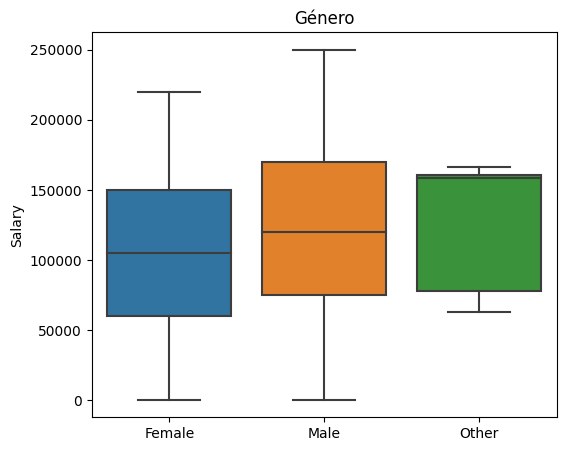

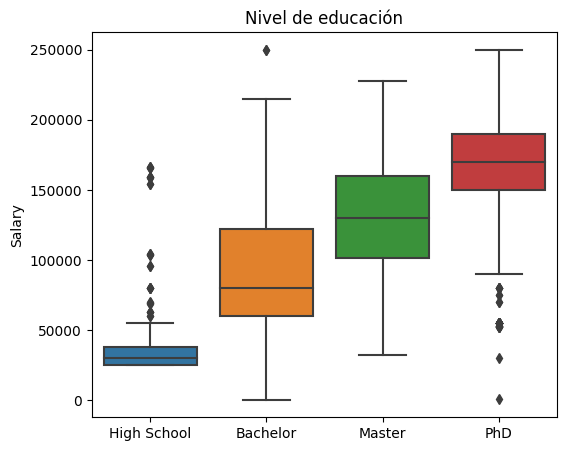

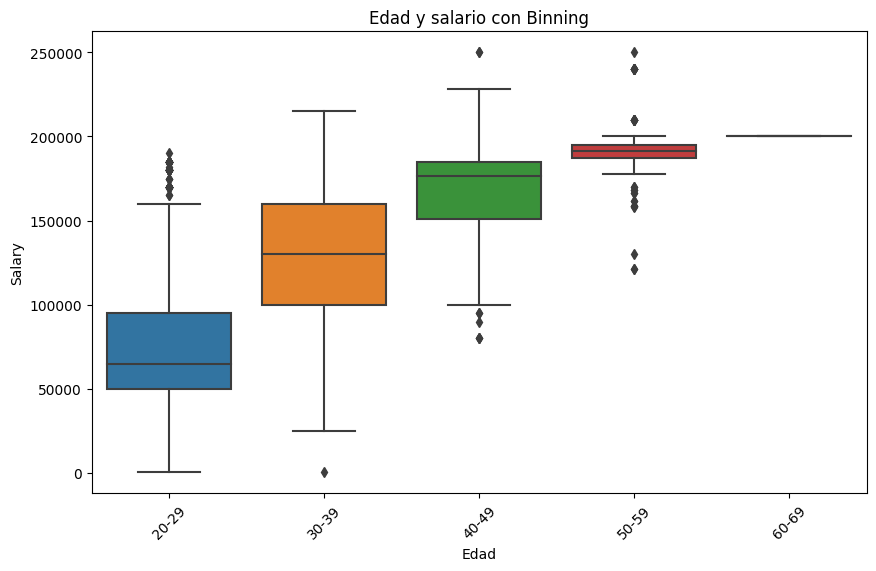

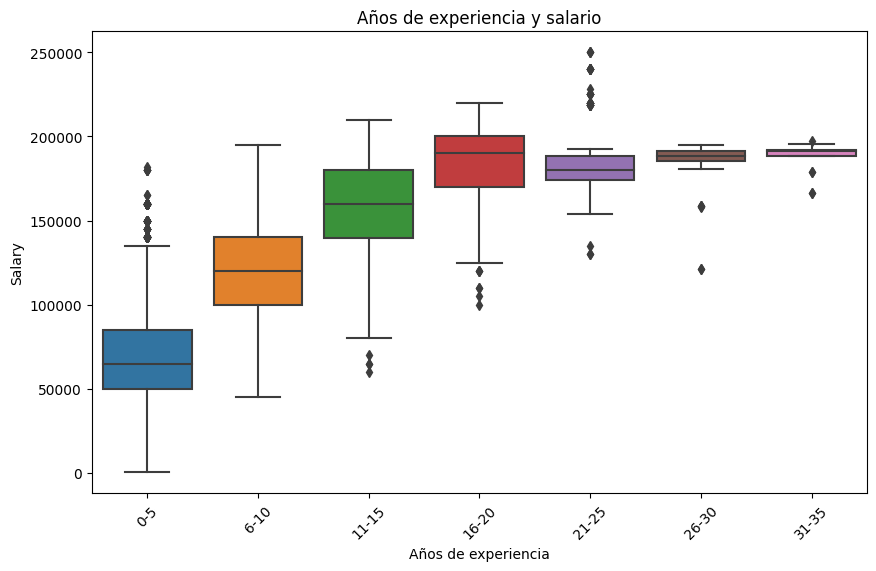

In [11]:
# Gráfico 1 - Género
xfactor = "Gender"
plt.figure(figsize=(6, 5))
g = sns.boxplot(x=xfactor, y="Salary", data=salary_data, order=salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title='Género', xlabel=None)
plt.xticks(rotation=0)
plt.show()

print("\n")

# Gráfico 2 - Nivel de educación
xfactor = "Education Level"
plt.figure(figsize=(6, 5))
g = sns.boxplot(x=xfactor, y="Salary", data=salary_data, order=salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title='Nivel de educación', xlabel=None)
plt.xticks(rotation=0)
plt.show()

print("\n")

# Gráfico 3 - Edad
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
salary_data['Age Group'] = pd.cut(salary_data['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
g = sns.boxplot(x='Age Group', y='Salary', data=salary_data)
plt.title('Edad y salario con Binning')
plt.xlabel('Edad')
plt.xticks(rotation=45)
plt.show()


print("\n")

# Gráfico 4 - Años de experiencia
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
salary_data['Experience Group'] = pd.cut(salary_data['Years of Experience'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
g = sns.boxplot(x='Experience Group', y='Salary', data=salary_data)
plt.title('Años de experiencia y salario')
plt.xlabel('Años de experiencia')
plt.xticks(rotation=45)
plt.show()

##¿La edad realmente afecta positivamente al salario?
Podemos esperar que el salario y la experiencia laboral tengan una correlación positiva y que la experiencia laboral y la edad tengan una correlación positiva. Sin embargo, ¿la edad y el salario también tienen una correlación positiva?

Vamos a corregir la experiencia laboral y examinar la relación entre la edad y el salario. Al hacerlo, descubrimos que la aparente correlación positiva entre la edad y el salario podría estar influenciada por las dos correlaciones previas (edad-YoE + YoE-salario => edad-salario). La verdad es que, cuando la experiencia laboral es la misma, la edad y el salario tienen una correlación negativa.

Esto sugiere que aunque inicialmente podría parecer que la edad tiene un impacto positivo en el salario, en realidad, cuando dos personas tienen la misma experiencia laboral, aquella que es más joven tiende a tener un salario más alto que la persona más mayor. Es decir, dentro de un mismo nivel de experiencia laboral, la edad no es un factor que contribuya a un aumento en el salario.

Es importante considerar que las relaciones entre estas variables pueden ser más complejas y estar influenciadas por otros factores, por lo que se necesitarían más análisis y datos adicionales para tener una comprensión completa de cómo la edad y el salario se relacionan realmente.


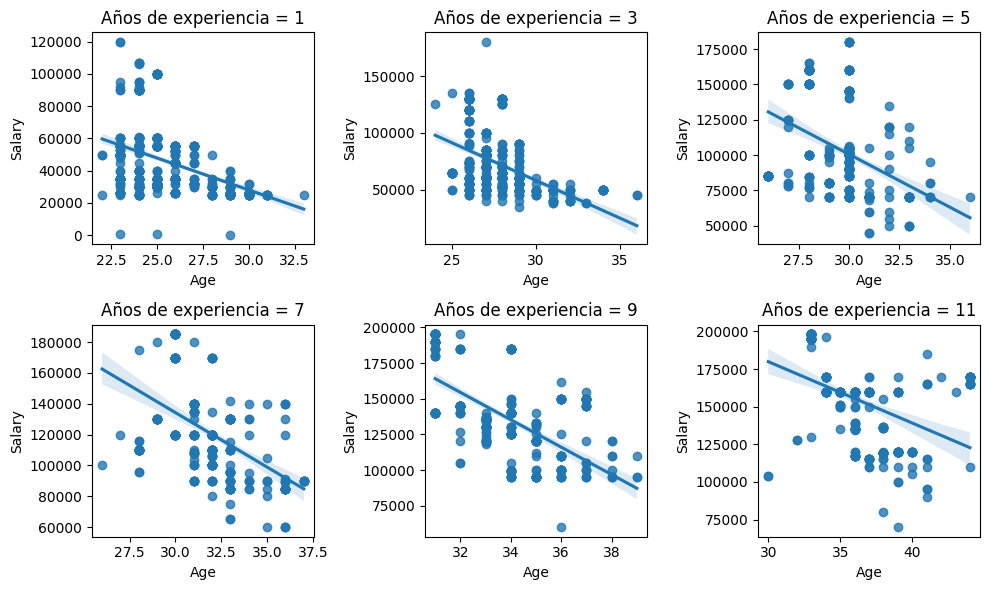

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
xfactor = "Age"

for i, yoe in enumerate([1, 3, 5, 7, 9, 11]):
    g = sns.regplot(x=xfactor, y="Salary", ax=axes[i//3, i%3], data=salary_data[salary_data['Years of Experience']==yoe])
    g.set(title=f'Años de experiencia = {yoe}')

plt.tight_layout()

### Factor de los puestos de trabajos

Text(0.5, 1.0, 'Los 20 trabajos más populares en la encuesta y el rango de salario.')

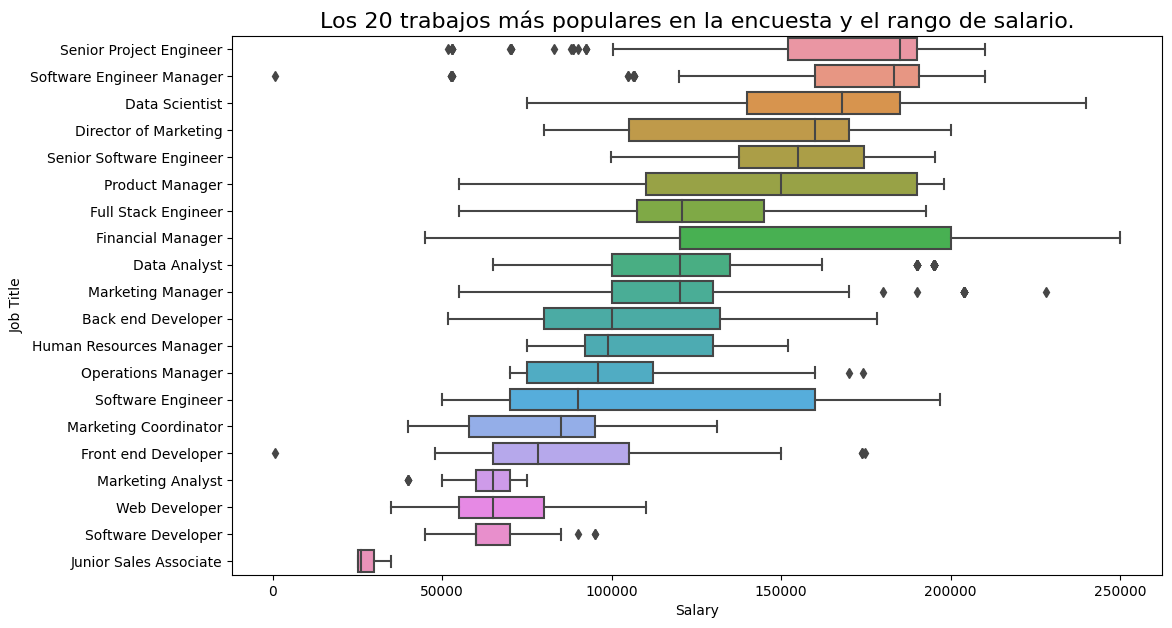

In [13]:
num_pop_jobs = 20
pop_jobs = salary_data['Job Title'].value_counts()[:num_pop_jobs].index
pop_jobs_data = salary_data[salary_data['Job Title'].isin(pop_jobs)]

plt.figure(figsize=(12, 7))
sns.boxplot(y="Job Title", x="Salary", data=pop_jobs_data,
            order=pop_jobs_data.groupby('Job Title')['Salary'].median().sort_values(ascending=False).index)
plt.title(f'Los {num_pop_jobs} trabajos más populares en la encuesta y el rango de salario.', fontsize=16)

<hr>

## Salario vs. Años de Experiencia: Género, Nivel de Educación y Títulos de Trabajo
En el análisis anterior, encontramos que el salario y la experiencia laboral tienen una correlación positiva: a mayor YoE, mayor salario. En esta parte, vamos a examinar la tasa de crecimiento potencial del salario con respecto al género, el nivel de educación y el título del trabajo. Es importante notar que no estamos analizando datos de participantes a lo largo de los años, sino que los datos de diferentes años de experiencias provienen de personas diferentes.

En las dos primeras figuras, hemos observado que:

Las tasas de crecimiento salarial para hombres y mujeres parecen ser similares.
Las tasas de crecimiento salarial para diferentes niveles de educación no difieren mucho entre sí, y la tasa para los titulados con doctorado es la más baja.
Esto significa que, en general, la experiencia laboral tiene una influencia positiva en el salario independientemente del género o el nivel de educación. Además, parece que tener un doctorado puede estar asociado con una tasa de crecimiento salarial un poco más lenta en comparación con otros niveles educativos.

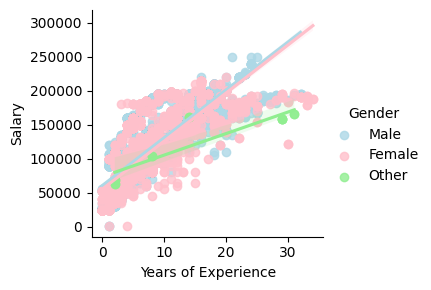

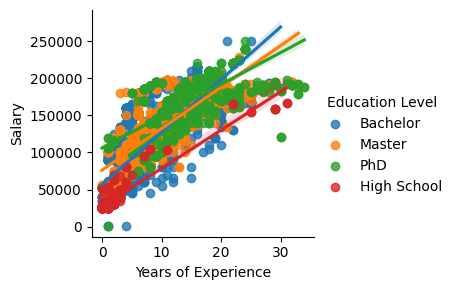

In [14]:
custom_palette = {'Male': 'lightblue', 'Female': 'pink', 'Other': 'lightgreen'}
sns.lmplot(data=salary_data, x='Years of Experience', y='Salary', hue='Gender', palette=custom_palette, height=3, aspect=1.2)
print("\n")
print("\n")
sns.lmplot(data=salary_data, x='Years of Experience', y='Salary', hue='Education Level', height=3, aspect=1.2)

## Los tres trabajos con las tasas de crecimiento más altas son: ingeniero de software, gerente financiero y gerente de productos.

Los tres trabajos con las tasas de crecimiento más bajas son: ingeniero de software senior, gerente de ingeniería de software y científico de datos.

Esto significa que, para los tres trabajos con las tasas de crecimiento más altas, el salario tiende a aumentar significativamente con el aumento de la experiencia laboral. Por otro lado, para los tres trabajos con las tasas de crecimiento más bajas, el salario tiende a tener un crecimiento más lento en comparación con otros trabajos, incluso cuando la experiencia laboral aumenta.

Es interesante notar que algunos de los trabajos con las tasas de crecimiento más bajas también están entre los trabajos mejor remunerados, lo que podría indicar que otros factores, además de la experiencia laboral, influyen en los salarios más altos para esos trabajos. Para comprender completamente las dinámicas salariales, es esencial considerar otros factores, como la ubicación geográfica, el nivel de educación y la demanda del mercado laboral para cada trabajo en particular. Estos factores no son estudiados en este caso.

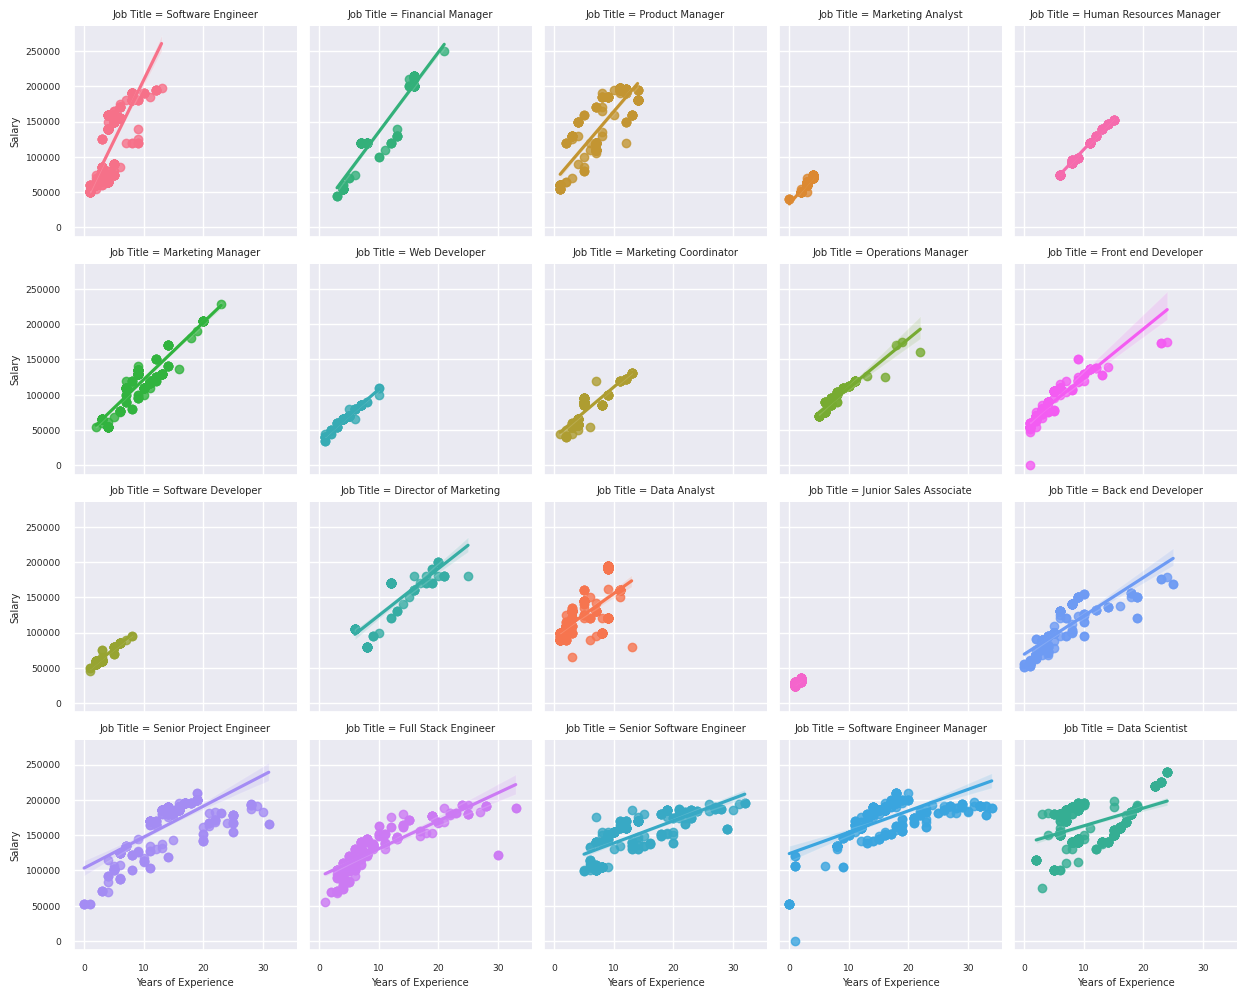

In [15]:
from scipy import stats

num_pop_jobs = 20
pop_jobs = salary_data['Job Title'].value_counts()[:num_pop_jobs].index

job_salary_slopes = []
for j in pop_jobs:
    job_data = salary_data[salary_data['Job Title']==j]
    slope, intercept, r_value, pv, se = stats.linregress(job_data['Years of Experience'], job_data['Salary'])
    job_salary_slopes.append([j, slope, intercept])
job_salary_slopes.sort(key = lambda x: x[1], reverse=True)
job_order = [e[0] for e in job_salary_slopes]

pop_jobs_data = salary_data[salary_data['Job Title'].isin(pop_jobs)]
sns.set(font_scale=0.6)
sns.lmplot(data=pop_jobs_data, x='Years of Experience', y='Salary', hue='Job Title', col='Job Title',
           col_wrap=5, col_order=job_order, height=2.5, aspect=1)
sns.set(font_scale=1)